# **Data Source:**
https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents; https://www.iihs.org/topics/fatality-statistics

# **Import Modules**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

# **Read Raw Data**

In [2]:
dataRaw=pd.read_csv('./US_Accidents_Dec21_updated.csv', header=0)

In [3]:
dataRaw.columns.to_list()

['ID',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Number',
 'Street',
 'Side',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [4]:
data = dataRaw

In [5]:
data['Start_Time'] = pd.to_datetime(data['Start_Time'], errors='coerce')
data['Date'] = pd.to_datetime(data['Start_Time'], errors='coerce').dt.date

In [6]:
data['Date'].min()

datetime.date(2016, 1, 14)

# **Drop Redundant/unrelated Columns**

In [7]:
data = data.drop(
['ID',
 'End_Lat',
 'End_Lng',
 'Number',
 'Street',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Turning_Loop'  # All values in Turning_Loop are 'False'
], axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 37 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Severity               int64         
 1   Start_Time             datetime64[ns]
 2   End_Time               object        
 3   Start_Lat              float64       
 4   Start_Lng              float64       
 5   Distance(mi)           float64       
 6   Description            object        
 7   Side                   object        
 8   City                   object        
 9   County                 object        
 10  State                  object        
 11  Temperature(F)         float64       
 12  Wind_Chill(F)          float64       
 13  Humidity(%)            float64       
 14  Pressure(in)           float64       
 15  Visibility(mi)         float64       
 16  Wind_Direction         object        
 17  Wind_Speed(mph)        float64       
 18  Precipitation(in)     

# **Distance Biscetion**

In [8]:
data['Distance_Bisection'] = 0

In [9]:
data.loc[data['Distance(mi)']>0.00621371192, 'Distance_Bisection'] = 1

# **Wind Direction = Calm**

In [10]:
# When Wind Direction is Calm, the value of Wind_Chill(F) and Wind_Speed(mph) will be null,
# which is not reasonable.

In [11]:
ind = (data['Wind_Direction'] == 'Calm')

In [12]:
data.loc[ind,'Wind_Speed(mph)'] = 0
data.loc[ind, 'Wind_Chill(F)'] = data['Temperature(F)']

# **Drop all the null Values**

In [13]:
data.isna().sum()

Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
Description                   0
Side                          0
City                        137
County                        0
State                         0
Temperature(F)            69274
Wind_Chill(F)            393478
Humidity(%)               73092
Pressure(in)              59200
Visibility(mi)            70546
Wind_Direction            73775
Wind_Speed(mph)           81410
Precipitation(in)        549458
Weather_Condition         70636
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway                       0
Roundabout                    0
Station                       0
Stop                          0
Traffic_Calming               0
Traffic_

In [14]:
data = data.dropna()
data = data.reset_index(drop=True)

# **Starting Date & Feature Etraction(weekday, Month)**

In [15]:
import datetime
data['Start_Time'] = pd.to_datetime(data['Start_Time'], errors='coerce')
date = pd.to_datetime(data['Start_Time'], errors='coerce').dt.date
print('The Srarting Date is {}'.format(date.min()))

The Srarting Date is 2016-01-14


In [16]:
data['Weekday']=data['Start_Time'].dt.strftime('%a')
data['Weekday'].head()

0    Mon
1    Mon
2    Mon
3    Mon
4    Mon
Name: Weekday, dtype: object

In [17]:
weekday = data['Weekday'].value_counts().index.tolist()
print(weekday)

['Fri', 'Thu', 'Wed', 'Tue', 'Mon', 'Sat', 'Sun']


In [18]:
data['DistanceRatio_Weekday'] = 0.0
for day in weekday:
    ind = (data['Weekday'] == day)
    tmpData = data[ind]
    severityRatio = ((tmpData['Distance_Bisection'] == 1).sum())/((tmpData['Distance_Bisection'] == 0).sum())
    print(day, severityRatio)
    data.loc[ind, 'DistanceRatio_Weekday'] = severityRatio

Fri 5.482395087001024
Thu 5.549878390672286
Wed 5.932800836971611
Tue 5.6719266938022574
Mon 5.521435754304595
Sat 6.398295736583751
Sun 6.0871594061021375


In [19]:
data['Month'] = data['Start_Time'].dt.strftime('%b')

In [20]:
months = data['Month'].value_counts().index.tolist()
data['DistanceRatio_Month'] = 0.0
for m in months:
    ind = (data['Month'] == m)
    tmpData = data[ind]
    severityRatio = ((tmpData['Distance_Bisection'] == 1).sum())/((tmpData['Distance_Bisection'] == 0).sum())
    print(m, severityRatio)
    data.loc[ind, 'DistanceRatio_Month'] = severityRatio

Dec 10.883755985103742
Nov 18.848185483870967
Oct 8.966181364392678
Sep 8.036576550527686
Jun 2.9371457445406213
Feb 4.140103649013205
Jan 3.760181145048261
May 2.3057089800971338
Apr 1.9717731129968736
Aug 22.89172452617752
Jul 63.25892351274788
Mar 1.9735192212506187


In [21]:
data['hour']=data['Start_Time'].dt.hour

# **Day-Night Data**

In [22]:
subData = data[[
                'Distance_Bisection',
                'Sunrise_Sunset',
                'Civil_Twilight',
                'Nautical_Twilight',
                'Astronomical_Twilight']]

subData.head(10)

,Distance_Bisection,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,1,Night,Night,Night,Night
1,1,Night,Night,Night,Night
2,1,Night,Night,Night,Day
3,1,Day,Day,Day,Day
4,1,Day,Day,Day,Day
5,1,Day,Day,Day,Day
6,1,Day,Day,Day,Day
7,1,Day,Day,Day,Day
8,1,Day,Day,Day,Day
9,1,Night,Night,Night,Night


In [23]:
# subData = subData.dropna()
print(len(subData))

identifierAT = subData['Astronomical_Twilight'] == 'Night'

identifierNT = subData['Nautical_Twilight'] == 'Night'
identifierNT[identifierAT] = False

identifierCT = subData['Civil_Twilight'] == 'Night'
identifierCT[identifierAT | identifierNT] = False

identifierSS = subData['Sunrise_Sunset'] == 'Night'
identifierSS[identifierAT | identifierNT | identifierCT] = False

identifierDay = (subData['Sunrise_Sunset'] == 'Day') & (subData['Nautical_Twilight'] == 'Day')\
& (subData['Astronomical_Twilight'] == 'Day') & (subData['Civil_Twilight'] == 'Day') 

print('AT = ', identifierAT.sum())
print('NT = ', identifierNT.sum())
print('CT = ', identifierCT.sum())
print('SS = ', identifierSS.sum())
#print('Day = ', len(subData)-identifierAT.sum()-identifierNT.sum()-identifierCT.sum()-identifierSS.sum())
print('Day = ', identifierDay.sum())

2213344
AT =  552409
NT =  90596
CT =  104408
SS =  88970
Day =  1376961


In [24]:
data['DistanceRatio_Light'] = 0.0
# data['SeverityRatio_Light_denum'] = 1

tmp = data[identifierAT]
data.loc[identifierAT, 'DistanceRatio_Light'] = (tmp.Distance_Bisection == 1).sum() / (tmp.Distance_Bisection == 0).sum()
# data['SeverityRatio_Light_denum'][identifierAT] = (tmp.Severity_Bisection == 1).sum()

tmp = data[identifierNT]
data.loc[identifierNT, 'DistanceRatio_Light'] = (tmp.Distance_Bisection == 1).sum() / (tmp.Distance_Bisection == 0).sum()
# data['SeverityRatio_Light_denum'][identifierNT] = (tmp.Severity_Bisection == 1).sum()

tmp = data[identifierCT]
data.loc[identifierCT, 'DistanceRatio_Light'] = (tmp.Distance_Bisection == 1).sum() / (tmp.Distance_Bisection == 0).sum()
# data['SeverityRatio_Light_denum'][identifierCT] = (tmp.Severity_Bisection == 1).sum()

tmp = data[identifierSS]
data.loc[identifierSS, 'DistanceRatio_Light'] = (tmp.Distance_Bisection == 1).sum() / (tmp.Distance_Bisection == 0).sum()
# data['SeverityRatio_Light_denum'][identifierSS] = (tmp.Severity_Bisection == 1).sum()

tmp = data[identifierDay]
data.loc[identifierDay, 'DistanceRatio_Light'] = (tmp.Distance_Bisection == 1).sum() / (tmp.Distance_Bisection == 0).sum()
# data['SeverityRatio_Light_denum'][identifierDay] = (tmp.Severity_Bisection == 1).sum()

## **Transform of day-night**

In [25]:
# Classification 1
data['DayNight'] = 'Bright'
data.loc[data['Astronomical_Twilight']=='Night', 'DayNight'] = 'Dark'
identifier = (data['Astronomical_Twilight']=='Day') & (data['Sunrise_Sunset']=='Night')
data.loc[identifier, 'DayNight'] = 'Dim'

In [26]:
# Classification 2
data['Light'] = 'Day'
data.loc[data['Astronomical_Twilight']=='Night', 'Light'] = 'AT'
data.loc[identifierNT, 'Light'] = 'NT'
data.loc[identifierCT, 'Light'] = 'CT'
data.loc[identifierSS, 'Light'] = 'SS'

# **Description: Analysis of Road Types**

## type 1

In [27]:
data['Distance_Road1'] = 0.0
data['Distance_Road0'] = 0.0
data['RoadType'] = 1

In [28]:
states = data['State'].unique()

In [29]:
print(states)

['OH' 'IN' 'KY' 'WV' 'PA' 'MI' 'CA' 'MN' 'LA' 'NE' 'MO' 'IA' 'TX' 'ND'
 'CO' 'KS' 'WI' 'OK' 'WY' 'SD' 'MS' 'AR' 'SC' 'IL' 'MA' 'RI' 'FL' 'ME'
 'NY' 'TN' 'MD' 'NC' 'GA' 'VA' 'NJ' 'CT' 'NH' 'DE' 'VT' 'DC' 'AL' 'MT'
 'ID' 'UT' 'AZ' 'NM' 'NV' 'WA' 'OR']


In [30]:
desc = data['Description']
stateDict= dict()
b = np.full(len(data), False, dtype=bool)
allIndicator = pd.Series(b)
for state in states:
    state1 = state+'-'
    state2 = ' '+state+' '
    indicator = []
    for statement in desc:
        # print(statement)
        if state1 in statement:
            indicator.append(1)
        elif state2 in statement:
            indicator.append(1)
        else:
            indicator.append(0)
    indicator = pd.Series(indicator).astype(bool)
    tmpData = data[indicator]
    allIndicator = indicator | allIndicator
    
    data.loc[indicator, 'Distance_Road1'] = (tmpData['Distance_Bisection']==1).sum()/len(tmpData)
    data.loc[indicator, 'Distance_Road0'] = (tmpData['Distance_Bisection']==0).sum()/len(tmpData)
    data.loc[indicator, 'RoadType'] = 1

dataCombine1 = data[allIndicator]
    

## type 2

In [31]:
data2 = data[~allIndicator]
data2 = data2.reset_index(drop=True)
# data2

In [32]:
desc = data2['Description']
print(len(data2))
stateDict= dict()

indicator = []
for statement in desc:
    # print(statement)
    if 'US-' in statement:
        indicator.append(1)
    elif ' US ' in statement:
        indicator.append(1)
    else:
        indicator.append(0)
indicator = pd.Series(indicator).astype(bool)

tmpData = data2[indicator]

data2.loc[indicator, 'Distance_Road1'] = (tmpData['Distance_Bisection']==1).sum()/len(tmpData)
data2.loc[indicator, 'Distance_Road0'] = (tmpData['Distance_Bisection']==0).sum()/len(tmpData)
data2.loc[indicator, 'RoadType'] = 2

dataCombine2 = data2[indicator]

1496961


In [33]:
data3 = data2[~indicator]
data3 = data3.reset_index(drop=True)

In [34]:
# data2.to_csv('tmp.csv',index=False)

In [35]:
desc = data3['Description']
print(len(data3))
stateDict= dict()

indicator = []
for statement in desc:
    if 'I-' in statement:
        indicator.append(1)
    else:
        indicator.append(0)
indicator = pd.Series(indicator).astype(bool)

tmpData = data3[indicator]

data3.loc[indicator, 'Distance_Road1'] = (tmpData['Distance_Bisection']==1).sum()/len(tmpData)
data3.loc[indicator, 'Distance_Road0'] = (tmpData['Distance_Bisection']==0).sum()/len(tmpData)
data3.loc[indicator, 'RoadType'] = 3

dataCombine3 = data3[indicator]

1293552


## type 3

In [36]:
data4 = data3[~indicator]
data4 = data4.reset_index(drop=True)

In [37]:
data4['Distance_Road1'] = (data4['Distance_Bisection']==1).sum()/len(tmpData)
data4['Distance_Road0'] = (data4['Distance_Bisection']==0).sum()/len(tmpData)
data4.loc[indicator, 'RoadType'] = 4

In [38]:
df = pd.concat([dataCombine1,dataCombine2,dataCombine3,data4], ignore_index=True)
data = df

## **Highway labeling**

In [39]:
desc = data['Description']
highwayIdentifier = []
for str in desc:
    str = str.lower()
    if 'highway' in str:
        highwayIdentifier.append(1)
    elif 'hwy' in str:
        highwayIdentifier.append(1)
    else:
        highwayIdentifier.append(0)
highwayIdentifier = pd.Series(highwayIdentifier).astype(bool)


routeIdentifier = []
for str in desc:
    str = str.lower()
    if 'route' in str:
        routeIdentifier.append(1)
    else:
        routeIdentifier.append(0)
routeIdentifier = pd.Series(routeIdentifier).astype(bool)


interHwyIdentifier = []
for str in desc:
    # str = str.lower()
    if 'I-' in str:
        interHwyIdentifier.append(1)
    else:
        interHwyIdentifier.append(0)
interHwyIdentifier = pd.Series(interHwyIdentifier).astype(bool)

In [41]:
data['Highway'] = 'Non-Hwy'
data['DistanceRatio_HighWay'] = 0.0

data.loc[highwayIdentifier, 'Highway'] = 'highway'
tmp = data[highwayIdentifier]
data.loc[highwayIdentifier, 'DistanceRatio_HighWay'] = (tmp['Distance_Bisection']==1).sum()/(tmp['Distance_Bisection']==0).sum()

data.loc[interHwyIdentifier, 'Highway'] = 'interHwy'
tmp = data[interHwyIdentifier]
data.loc[interHwyIdentifier, 'DistanceRatio_HighWay'] = (tmp['Distance_Bisection']==1).sum()/(tmp['Distance_Bisection']==0).sum()

data.loc[routeIdentifier, 'Highway'] = 'route'
tmp = data[routeIdentifier]
data.loc[routeIdentifier, 'DistanceRatio_HighWay'][routeIdentifier] = (tmp['Distance_Bisection']==1).sum()/(tmp['Distance_Bisection']==0).sum()

identifier = (routeIdentifier | highwayIdentifier | interHwyIdentifier)
tmp = data[~identifier]
data.loc[~identifier, 'DistanceRatio_HighWay'] = (tmp['Distance_Bisection']==1).sum()/(tmp['Distance_Bisection']==0).sum()


# **Death Rate & Death Vehicle**

In [42]:
dr = pd.read_csv('DeathRate.csv',header=0)

In [43]:
data['DeathRate']=1.0

In [44]:
stateNames = data['State'].value_counts().index.tolist()

for state in stateNames:
    identifier = data['State'] == state
    data.loc[identifier, 'DeathRate'] = dr.loc[0, state]

In [45]:
dv = pd.read_csv('DeathVehicle.csv',header=0)

In [46]:
data['DeathVehicle']=1.0

In [47]:
stateNames = data['State'].value_counts().index.tolist()

for state in stateNames:
    identifier = data['State'] == state
    data.loc[identifier, 'DeathVehicle'] = dv.loc[0, state]

# **Model Training**

In [48]:
data.columns.to_list()

['Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'Distance(mi)',
 'Description',
 'Side',
 'City',
 'County',
 'State',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight',
 'Date',
 'Distance_Bisection',
 'Weekday',
 'DistanceRatio_Weekday',
 'Month',
 'DistanceRatio_Month',
 'hour',
 'DistanceRatio_Light',
 'DayNight',
 'Light',
 'Distance_Road1',
 'Distance_Road0',
 'RoadType',
 'Highway',
 'DistanceRatio_HighWay',
 'DeathRate',
 'DeathVehicle']

In [49]:
data2 = data[['Severity',
 # 'Start_Time',
 # 'End_Time',
 'Start_Lat',
 'Start_Lng',
 # 'Distance(mi)',
 # 'Description',
 'Side',
 'City',
 'County',
 'State',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 # 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 # 'Sunrise_Sunset',
 # 'Civil_Twilight',
 # 'Nautical_Twilight',
 # 'Astronomical_Twilight',
 # 'Date',
 'Distance_Bisection',
 'Weekday',
 # 'DistanceRatio_Weekday',
 'Month',
 # 'DistanceRatio_Month',
 'hour',
 # 'DistanceRatio_Light',
 'DayNight',
 'Light',
 'Distance_Road1',
 'Distance_Road0',
 'RoadType',
 'Highway',
 # 'DistanceRatio_HighWay',
 'DeathRate',
 'DeathVehicle']]

In [50]:
data2.columns.to_list()

['Severity',
 'Start_Lat',
 'Start_Lng',
 'Side',
 'City',
 'County',
 'State',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Distance_Bisection',
 'Weekday',
 'Month',
 'hour',
 'DayNight',
 'Light',
 'Distance_Road1',
 'Distance_Road0',
 'RoadType',
 'Highway',
 'DeathRate',
 'DeathVehicle']

## **Label Encoding**

In [52]:
data2.replace({False: 0, True: 1}, inplace=True)

C:\Users\kiwi\anaconda3\envs\study__py_r\lib\site-packages\pandas\core\frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [53]:
# data2.replace({'Day': 0, 'Night': 1}, inplace=True)

In [54]:
data2['Side'].replace({'L': 0, 'R': 1}, inplace=True)

C:\Users\kiwi\anaconda3\envs\study__py_r\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [55]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [57]:
labelencoder = LabelEncoder()
data2.insert(1,'State_le', labelencoder.fit_transform(data['State']))
data2['City'] = labelencoder.fit_transform(data['City'])
data2.insert(1,'County_le', labelencoder.fit_transform(data['County']))
data2.insert(1,'Weather_Condition_le', labelencoder.fit_transform(data['Weather_Condition']))
data2.insert(1,'Month_le', labelencoder.fit_transform(data['Month']))
data2.insert(1,'Weekday_le', labelencoder.fit_transform(data['Weekday']))
data2.insert(1,'Light_le', labelencoder.fit_transform(data['Light']))
data2['Highway'] = labelencoder.fit_transform(data['Highway'])
data2['DayNight'] = labelencoder.fit_transform(data['DayNight'])
data2['Light'] = labelencoder.fit_transform(data['Light'])
data2 = data2.drop(['State',  'Weather_Condition', 'Month', 'Weekday','DayNight'], axis=1)
data2 = data2.drop(['County'], axis=1)


C:\Users\kiwi\anaconda3\envs\study__py_r\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\kiwi\anaconda3\envs\study__py_r\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\kiwi\anaconda3\envs\study__py_r\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [59]:
data2.columns.to_list()

['Severity',
 'Light_le',
 'Weekday_le',
 'Month_le',
 'Weather_Condition_le',
 'County_le',
 'State_le',
 'Start_Lat',
 'Start_Lng',
 'Side',
 'City',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Distance_Bisection',
 'hour',
 'Light',
 'Distance_Road1',
 'Distance_Road0',
 'RoadType',
 'Highway',
 'DeathRate',
 'DeathVehicle']

In [61]:
data2

,Severity,Light_le,Weekday_le,Month_le,Weather_Condition_le,County_le,State_le,Start_Lat,Start_Lng,Side,...,Traffic_Signal,Distance_Bisection,hour,Light,Distance_Road1,Distance_Road0,RoadType,Highway,DeathRate,DeathVehicle
0,3,0,1,3,49,496,33,40.108910,-83.092860,1,...,0,1,0,0,0.518761,0.481239,1,0,16.2,1.01
1,2,0,1,3,49,930,33,39.865420,-84.062800,1,...,0,1,5,0,0.518761,0.481239,1,0,16.2,1.01
2,2,2,1,3,57,590,33,39.192880,-84.477230,1,...,0,1,15,2,0.518761,0.481239,1,0,16.2,1.01
3,2,2,1,3,57,567,33,39.582242,-83.677814,1,...,0,1,17,2,0.518761,0.481239,1,0,16.2,1.01
4,3,0,1,3,69,496,33,39.972410,-82.846950,1,...,0,1,19,0,0.518761,0.481239,1,0,16.2,1.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213339,2,2,0,1,13,1430,3,34.261030,-119.228000,1,...,0,1,17,2,1.578855,0.519087,1,0,10.3,1.06
2213340,2,2,0,1,13,1170,3,34.002480,-117.379360,1,...,0,1,18,2,1.578855,0.519087,1,0,10.3,1.06
2213341,2,2,0,1,13,1217,3,32.766960,-117.148060,1,...,0,1,19,2,1.578855,0.519087,1,0,10.3,1.06
2213342,2,2,0,1,71,1017,3,33.775450,-117.847790,1,...,0,1,19,2,1.578855,0.519087,1,0,10.3,1.06


## **Train-Test Split**

In [62]:
data3_1 = data2[data2.Distance_Bisection==1]
data3_0 = data2[data2.Distance_Bisection==0]

In [63]:
data3_1 = data3_1.sample(n=len(data3_0), replace=False)

In [64]:
data3_all = pd.concat([data3_0, data3_1])
data3 = data3_all

In [65]:
len(data3)

655382

In [67]:
data3.columns.to_list()

['Severity',
 'Light_le',
 'Weekday_le',
 'Month_le',
 'Weather_Condition_le',
 'County_le',
 'State_le',
 'Start_Lat',
 'Start_Lng',
 'Side',
 'City',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Distance_Bisection',
 'hour',
 'Light',
 'Distance_Road1',
 'Distance_Road0',
 'RoadType',
 'Highway',
 'DeathRate',
 'DeathVehicle']

In [69]:
labels = data3['Distance_Bisection']
data3 = data3.drop(['Distance_Bisection'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data3, labels,test_size=0.2, random_state=100)

In [71]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655382 entries, 16 to 1426320
Data columns (total 38 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Severity              655382 non-null  int64  
 1   Light_le              655382 non-null  int32  
 2   Weekday_le            655382 non-null  int32  
 3   Month_le              655382 non-null  int32  
 4   Weather_Condition_le  655382 non-null  int32  
 5   County_le             655382 non-null  int32  
 6   State_le              655382 non-null  int32  
 7   Start_Lat             655382 non-null  float64
 8   Start_Lng             655382 non-null  float64
 9   Side                  655382 non-null  int64  
 10  City                  655382 non-null  int32  
 11  Temperature(F)        655382 non-null  float64
 12  Wind_Chill(F)         655382 non-null  float64
 13  Humidity(%)           655382 non-null  float64
 14  Pressure(in)          655382 non-null  float64
 15

## **Feature Importance**

### **ExtraTrees**

In [72]:
from sklearn.ensemble import ExtraTreesClassifier
ETreec = ExtraTreesClassifier(max_depth=50,n_estimators=50,criterion='gini')

In [73]:
ETreec.fit(X_train, y_train)
ETree_pred=ETreec.predict(X_test)
print(ETree_pred)

[0 1 0 ... 0 1 0]


In [74]:
ETreetrain_score=ETreec.score(X_train, y_train)
print(ETreetrain_score)

0.9999046356605411


In [75]:
ETreetest_score=ETreec.score(X_test,y_test)
print('The Accuracy of ExtraTrees Classifier on testing set:', ETreetest_score)


The Accuracy of ExtraTrees Classifier on testing set: 0.8729983139681257


In [76]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,ETree_pred))
print(confusion_matrix(y_test,ETree_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88     65686
           1       0.90      0.84      0.87     65391

    accuracy                           0.87    131077
   macro avg       0.87      0.87      0.87    131077
weighted avg       0.87      0.87      0.87    131077

[[59379  6307]
 [10340 55051]]


In [77]:
ETreec.feature_importances_

array([4.51017261e-02, 1.31698257e-02, 3.18158302e-02, 7.88430585e-02,
       2.60062624e-02, 2.99205178e-02, 2.74239780e-02, 6.72646699e-02,
       1.02913147e-01, 1.20608005e-02, 3.31685895e-02, 3.97479298e-02,
       3.94951392e-02, 3.78571487e-02, 4.17549447e-02, 1.76427893e-02,
       3.17512265e-02, 7.45809580e-03, 1.82878255e-03, 7.67558244e-05,
       6.61608366e-03, 8.20125688e-04, 8.35664292e-03, 4.13956935e-04,
       1.65467644e-03, 2.19596644e-05, 3.05951687e-03, 3.40317286e-03,
       1.59602038e-04, 3.64715513e-02, 3.47103864e-02, 1.46383907e-02,
       3.91121872e-02, 4.80960309e-02, 1.61050406e-02, 4.33870908e-02,
       2.41571590e-02, 3.35152078e-02])

In [78]:
importance = ETreec.feature_importances_
feature_names = ETreec.feature_names_in_

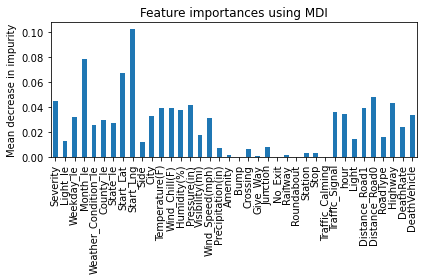

In [79]:
import matplotlib.pyplot as plt
forest_importances = pd.Series(importance, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
fig.savefig('distance_1', dpi=300)

### **XGBOOST**

In [80]:
from xgboost.sklearn import XGBClassifier
xgbc = XGBClassifier(        
        n_estimators=100,     #樹的個數
        learning_rate= 0.1,    # 如同學習率 
        max_depth=24,       # 構建樹的深度，越大越容易過擬合    
        subsample=1,         # 隨機取樣訓練樣本 訓練例項的子取樣比
        gamma=0,         # 用於控制是否後剪枝的引數,越大越保守，一般0.1、0.2這樣子
        reg_lambda=2,#0.8,   #1       # 控制模型複雜度的權重值的L2正則化項引數，引數越大，模型越不容易過擬合。
        max_delta_step=0,        #最大增量步長，我們允許每個樹的權重估計。
        colsample_bytree=1,         # 生成樹時進行的列取樣 
        min_child_weight=0.01, 
                     # 這個引數預設是 1，是每個葉子裡面 h 的和至少是多少，對正負樣本不均衡時的 0-1 分類而言
                     # 假設 h 在 0.01 附近，min_child_weight 為 1 意味著葉子節點中最少需要包含 100 個樣本。
                     #這個引數非常影響結果，控制葉142子節點中二階導的和的最小值，該引數值越小，越容易 overfitting。
        seed=999,   #隨機種子
#        reg_alpha=0,        # L1 正則項引數
        #scale_pos_weight=1,        #如果取值大於0的話，在類別樣本不平衡的情況下有助於快速收斂。平衡正負權重
        #objective= 'multi:softmax',         #多分類的問題 指定學習任務和相應的學習目標
        #num_class=10,        # 類別數，多分類與 multisoftmax 並用
#        silent=0 ,        # 設定成1則沒有執行資訊輸出，最好是設定為0.是否在執行升級時列印訊息。
#        nthread=4,        # cpu 執行緒數 預設最大
        #eval_metric= 'auc'
)


In [81]:
xgbc.fit(X_train, y_train)
XGB_pred=xgbc.predict(X_test)
print(XGB_pred)

C:\Users\kiwi\anaconda3\envs\study__py_r\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:49:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0 1 0 ... 0 1 0]


In [82]:
XGBtrain_score=xgbc.score(X_train, y_train)
print(XGBtrain_score)

0.997921057399796


In [83]:
XGBtest_score=xgbc.score(X_test,y_test)
print('The Accuracy of XGBOOST Classifier on testing set:', XGBtest_score)

The Accuracy of XGBOOST Classifier on testing set: 0.9026602683918613


In [84]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,XGB_pred))
print(confusion_matrix(y_test,XGB_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90     65686
           1       0.92      0.88      0.90     65391

    accuracy                           0.90    131077
   macro avg       0.90      0.90      0.90    131077
weighted avg       0.90      0.90      0.90    131077

[[60544  5142]
 [ 7617 57774]]


In [85]:
xgbc.feature_importances_

array([0.04516199, 0.00385682, 0.00461843, 0.04493734, 0.00572444,
       0.00549789, 0.02551593, 0.01383667, 0.01662917, 0.01276053,
       0.00764964, 0.00929299, 0.01125799, 0.00848855, 0.0093595 ,
       0.00849392, 0.00708645, 0.0071098 , 0.00497143, 0.00526871,
       0.00657244, 0.00505938, 0.0093617 , 0.00537777, 0.005807  ,
       0.00938146, 0.00514124, 0.00739893, 0.00588365, 0.12117976,
       0.00852913, 0.        , 0.02830401, 0.36278784, 0.01083767,
       0.06438248, 0.0173401 , 0.06913728], dtype=float32)

## **Feature Redection - Use Feature Importance by Decision Tree( ExtraTrees)**

In [86]:
data3 = data3_all.drop(['Amenity','Bump', 'Give_Way', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming','Precipitation(in)','Crossing','Junction'], axis=1)

In [87]:
labels = data3['Distance_Bisection']
#data3 = data3.drop(['Severity_Bisection', 'Distance(mi)', 'cautionIdentifier'], axis=1)
data3 = data3.drop(['Distance_Bisection'], axis=1)
#data3 = data3.drop(['Severity_Bisection'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data3, labels,test_size=0.2, random_state=100)

### XGBoost

In [96]:
from xgboost.sklearn import XGBClassifier
xgbc = XGBClassifier(        
        n_estimators=100,     #樹的個數
        learning_rate= 0.1,    # 如同學習率 
        max_depth=24,       # 構建樹的深度，越大越容易過擬合    
        subsample=1,         # 隨機取樣訓練樣本 訓練例項的子取樣比
        gamma=0,         # 用於控制是否後剪枝的引數,越大越保守，一般0.1、0.2這樣子
        reg_lambda=2,#0.8,   #1       # 控制模型複雜度的權重值的L2正則化項引數，引數越大，模型越不容易過擬合。
        max_delta_step=0,        #最大增量步長，我們允許每個樹的權重估計。
        colsample_bytree=1,         # 生成樹時進行的列取樣 
        min_child_weight=0.01, 
                     # 這個引數預設是 1，是每個葉子裡面 h 的和至少是多少，對正負樣本不均衡時的 0-1 分類而言
                     # 假設 h 在 0.01 附近，min_child_weight 為 1 意味著葉子節點中最少需要包含 100 個樣本。
                     #這個引數非常影響結果，控制葉142子節點中二階導的和的最小值，該引數值越小，越容易 overfitting。
        seed=999,   #隨機種子
#        reg_alpha=0,        # L1 正則項引數
        #scale_pos_weight=1,        #如果取值大於0的話，在類別樣本不平衡的情況下有助於快速收斂。平衡正負權重
        #objective= 'multi:softmax',         #多分類的問題 指定學習任務和相應的學習目標
        #num_class=10,        # 類別數，多分類與 multisoftmax 並用
#        silent=0 ,        # 設定成1則沒有執行資訊輸出，最好是設定為0.是否在執行升級時列印訊息。
#        nthread=4,        # cpu 執行緒數 預設最大
        #eval_metric= 'auc'
)


In [97]:
xgbc.fit(X_train, y_train)
XGB_pred=xgbc.predict(X_test)
print(XGB_pred)

C:\Users\kiwi\anaconda3\envs\study__py_r\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:01:55] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0 1 0 ... 0 1 0]


In [98]:
XGBtrain_score=xgbc.score(X_train, y_train)
print(XGBtrain_score)

0.9977551234491374


In [99]:
XGBtest_score=xgbc.score(X_test,y_test)
print('The Accuracy of XGBOOST Classifier on testing set:', XGBtest_score)

The Accuracy of XGBOOST Classifier on testing set: 0.9026602683918613


In [100]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,XGB_pred))
print(confusion_matrix(y_test,XGB_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90     65686
           1       0.92      0.88      0.90     65391

    accuracy                           0.90    131077
   macro avg       0.90      0.90      0.90    131077
weighted avg       0.90      0.90      0.90    131077

[[60593  5093]
 [ 7666 57725]]


In [101]:
xgbc.feature_importances_

array([0.05020567, 0.00438842, 0.00522252, 0.04906693, 0.00648788,
       0.0061071 , 0.0287028 , 0.01522566, 0.01796913, 0.01393108,
       0.00851886, 0.0102017 , 0.01235729, 0.00935526, 0.01042131,
       0.00935089, 0.00792113, 0.1098133 , 0.00934187, 0.        ,
       0.03181672, 0.408152  , 0.01206473, 0.06926564, 0.01779204,
       0.07632006], dtype=float32)

### ExtraTrees

In [102]:
ETreec = ExtraTreesClassifier(max_depth=50,n_estimators=50,criterion='gini')

In [103]:
ETreec.fit(X_train, y_train)
ETree_pred=ETreec.predict(X_test)
print(ETree_pred)

[0 1 0 ... 0 1 0]


In [104]:
ETreetrain_score=ETreec.score(X_train, y_train)
print(ETreetrain_score)

0.9999065429473303


In [105]:
ETreetest_score=ETreec.score(X_test,y_test)
print('The Accuracy of ExtraTrees Classifier on testing set:', ETreetest_score)


The Accuracy of ExtraTrees Classifier on testing set: 0.8749208480511456


In [106]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,ETree_pred))
print(confusion_matrix(y_test,ETree_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     65686
           1       0.90      0.84      0.87     65391

    accuracy                           0.87    131077
   macro avg       0.88      0.87      0.87    131077
weighted avg       0.88      0.87      0.87    131077

[[59480  6206]
 [10189 55202]]


In [107]:
ETreec.feature_importances_

array([0.04688552, 0.01387809, 0.03390836, 0.08637463, 0.02729834,
       0.03081793, 0.0306839 , 0.06724082, 0.09809647, 0.01234348,
       0.03433284, 0.04168675, 0.04153826, 0.04070895, 0.04456849,
       0.01864997, 0.03371924, 0.03723172, 0.03662915, 0.01402824,
       0.04153961, 0.05825422, 0.01479371, 0.04176405, 0.02357522,
       0.02945205])

In [108]:
importance = ETreec.feature_importances_
feature_names = ETreec.feature_names_in_

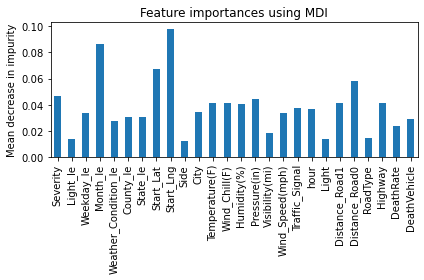

In [109]:
import matplotlib.pyplot as plt
forest_importances = pd.Series(importance, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
fig.savefig('distance_1', dpi=300)

### C4.5 - CART

In [110]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [111]:
# Create Decision Tree classifer object
# max_depth=5,min_samples_leaf=20 決定修剪的Threshole
CartC45 = DecisionTreeClassifier(criterion="gini",max_depth=40,min_samples_leaf=10)  #CART-->gini c4.5-->entropy min_samples_leaf=20, max_depth=4

# Train Decision Tree Classifer
CartC45.fit(X_train,y_train)
CartC45_pred =CartC45.predict(X_test)
print(CartC45_pred)

[0 1 0 ... 0 1 0]


In [112]:
print(y_test)

2155861    0
958909     1
662800     0
699289     0
2150113    0
          ..
631864     0
2066717    0
1978273    0
518620     1
2208937    0
Name: Distance_Bisection, Length: 131077, dtype: int64


In [113]:
CartC45train_score=CartC45.score(X_train, y_train)
print(CartC45train_score)

0.9033120035094077


In [114]:
CartC45test_score=CartC45.score(X_test,y_test)
print('The Accuracy of CART/C4.5 Classifier on testing set:', CartC45test_score)

The Accuracy of CART/C4.5 Classifier on testing set: 0.846410888256521


In [115]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,CartC45_pred))
print(confusion_matrix(y_test,CartC45_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85     65686
           1       0.86      0.83      0.84     65391

    accuracy                           0.85    131077
   macro avg       0.85      0.85      0.85    131077
weighted avg       0.85      0.85      0.85    131077

[[56643  9043]
 [11089 54302]]


In [116]:
CartC45.feature_importances_

array([0.08266695, 0.00297677, 0.01531329, 0.15357252, 0.01032912,
       0.01030662, 0.03167309, 0.10230912, 0.11140021, 0.00743252,
       0.01748775, 0.01898658, 0.01839337, 0.0239662 , 0.03349054,
       0.00687372, 0.01181894, 0.04752499, 0.01834004, 0.00371119,
       0.00359964, 0.18957244, 0.00428532, 0.04262399, 0.00529188,
       0.02605319])

### LightGBM

In [117]:
import lightgbm as lgb
from sklearn.preprocessing import LabelBinarizer

In [118]:
import lightgbm as lgb
lgbmc = lgb.LGBMClassifier()

In [119]:
lgbmc.fit(X_train, y_train)
LGBM_pred=lgbmc.predict(X_test)
print(LGBM_pred)

[0 1 0 ... 0 1 0]


In [120]:
LGBMtrain_score=lgbmc.score(X_train, y_train)
print(LGBMtrain_score)

0.8435681521251943


In [121]:
LGBMtest_score=lgbmc.score(X_test,y_test)
print('The Accuracy of LightGBM Classifier on testing set:', LGBMtest_score)

The Accuracy of LightGBM Classifier on testing set: 0.8432676976128535


In [122]:
print(classification_report(y_test,LGBM_pred))
print(confusion_matrix(y_test,LGBM_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85     65686
           1       0.87      0.80      0.84     65391

    accuracy                           0.84    131077
   macro avg       0.85      0.84      0.84    131077
weighted avg       0.85      0.84      0.84    131077

[[58110  7576]
 [12968 52423]]


### RandomForest

In [123]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, 
                       min_samples_leaf=40, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
#rfc=RandomForestClassifier()#使用預設直

In [124]:
rfc.fit(X_train, y_train)
RF_pred=rfc.predict(X_test)
print(RF_pred)

[0 1 0 ... 0 1 0]


In [125]:
RFtrain_score=rfc.score(X_train, y_train)
print(RFtrain_score)

0.8656011291137792


In [126]:
RFtest_score=rfc.score(X_test,y_test)
print('The Accuracy of RandomForest Classifier on testing set:', RFtest_score)

The Accuracy of RandomForest Classifier on testing set: 0.8543375267972261


In [127]:
print(classification_report(y_test,RF_pred))
print(confusion_matrix(y_test,RF_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86     65686
           1       0.89      0.81      0.85     65391

    accuracy                           0.85    131077
   macro avg       0.86      0.85      0.85    131077
weighted avg       0.86      0.85      0.85    131077

[[58939  6747]
 [12346 53045]]


### AdaBoost

In [128]:
from sklearn.ensemble import AdaBoostClassifier#若為數值要改成  AdaBoostregressor
AdaBoostc = AdaBoostClassifier(random_state=0)

In [129]:
AdaBoostc.fit(X_train, y_train)
AdaBoostc_pred=AdaBoostc.predict(X_test)
print(AdaBoostc_pred)

[0 1 0 ... 0 1 0]


In [130]:
AdaBoosttrain_score=AdaBoostc.score(X_train, y_train)
print(AdaBoosttrain_score)

0.7953996242645025


In [131]:
AdaBoosttest_score=AdaBoostc.score(X_test,y_test)
print('The Accuracy of AdaBoost Classifier on testing set:', AdaBoosttest_score)

The Accuracy of AdaBoost Classifier on testing set: 0.7969742975502949


In [132]:
print(classification_report(y_test,AdaBoostc_pred))
print(confusion_matrix(y_test,AdaBoostc_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80     65686
           1       0.81      0.78      0.79     65391

    accuracy                           0.80    131077
   macro avg       0.80      0.80      0.80    131077
weighted avg       0.80      0.80      0.80    131077

[[53678 12008]
 [14604 50787]]


### CatBOOST

In [136]:
# !pip install catboost
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('ggplot') 
import seaborn as sns
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold


In [138]:
CatBc = CatBoostClassifier(iterations=100,
  learning_rate=1,
  depth=8,
  loss_function='MultiClass')

In [143]:
CatBc.fit(X_train, y_train)
CatB_pred=CatBc.predict(X_test)
# print(CatB_pred)

0:	learn: 0.4884662	total: 251ms	remaining: 24.9s
1:	learn: 0.4408301	total: 465ms	remaining: 22.8s
2:	learn: 0.4155320	total: 722ms	remaining: 23.3s
3:	learn: 0.4042423	total: 953ms	remaining: 22.9s
4:	learn: 0.3960382	total: 1.18s	remaining: 22.4s
5:	learn: 0.3915349	total: 1.4s	remaining: 22s
6:	learn: 0.3878622	total: 1.62s	remaining: 21.5s
7:	learn: 0.3835496	total: 1.85s	remaining: 21.3s
8:	learn: 0.3806868	total: 2.06s	remaining: 20.9s
9:	learn: 0.3772565	total: 2.3s	remaining: 20.7s
10:	learn: 0.3758389	total: 2.52s	remaining: 20.4s
11:	learn: 0.3741933	total: 2.76s	remaining: 20.3s
12:	learn: 0.3726034	total: 3s	remaining: 20.1s
13:	learn: 0.3709909	total: 3.24s	remaining: 19.9s
14:	learn: 0.3687805	total: 3.48s	remaining: 19.7s
15:	learn: 0.3675947	total: 3.69s	remaining: 19.4s
16:	learn: 0.3665216	total: 3.92s	remaining: 19.1s
17:	learn: 0.3638067	total: 4.16s	remaining: 18.9s
18:	learn: 0.3626437	total: 4.37s	remaining: 18.6s
19:	learn: 0.3613318	total: 4.61s	remaining: 18.

In [144]:
CatBtrain_score=CatBc.score(X_train, y_train)
print(CatBtrain_score)

0.8702129485700117


In [145]:
CatBest_score=CatBc.score(X_test,y_test)
print('The Accuracy of CatBOOST Classifier on testing set:',CatBest_score)

The Accuracy of CatBOOST Classifier on testing set: 0.8603874058759355


In [146]:
print(classification_report(y_test,CatB_pred))
print(confusion_matrix(y_test,CatB_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86     65686
           1       0.88      0.84      0.86     65391

    accuracy                           0.86    131077
   macro avg       0.86      0.86      0.86    131077
weighted avg       0.86      0.86      0.86    131077

[[58114  7572]
 [10728 54663]]
